In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option('display.max_columns', None)

In [24]:
import analyze_utils

save_dir = '/home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation3'

r, all_losses = analyze_utils.load_results_and_cache_autoprompt_json(
    save_dir, include_losses=True, do_reranking=True, save_file='r.pkl')

getting dir_names...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 942/942 [00:40<00:00, 23.01it/s]


In [25]:
top_prompts = (
    r# .sort_values(by='prefix_train_loss', ascending=False)
     .groupby(['task_name', 'seed', 'checkpoint', 'iprompt_generation_checkpoint'])
).first().reset_index()

In [26]:
GPTJ = 'EleutherAI/gpt-j-6B'
dict(top_prompts[
      (top_prompts['checkpoint'] == GPTJ)
    & (top_prompts['iprompt_generation_checkpoint'] == GPTJ)
].iloc[0])

{'task_name': 'add_two',
 'seed': 6,
 'checkpoint': 'EleutherAI/gpt-j-6B',
 'iprompt_generation_checkpoint': 'EleutherAI/gpt-j-6B',
 'model_cls': 'iprompt',
 'batch_size': 16,
 'n_epochs': 100,
 'max_n_steps': 10000000000,
 'max_n_datapoints': 5000,
 'train_split_frac': 1.0,
 'max_dset_size': 5000,
 'early_stopping_steps': 50,
 'max_digit': 10,
 'template_num_init_string': 0,
 'template_num_task_phrasing': 0,
 'save_dir': '/home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation3',
 'epoch_save_interval': 1,
 'lr': 0.0001,
 'gamma': 0.0,
 'n_shots': 5,
 'autoprompt_init_strategy': 'the',
 'max_length': 64,
 'single_shot_loss': 1,
 'mask_possible_answers': 0,
 'hotflip_num_candidates': 10,
 'accum_grad_over_epoch': 0,
 'num_learned_tokens': 6,
 'use_preprefix': 0,
 'iprompt_preprefix_str': '',
 'iprompt_pop_size': 4,
 'iprompt_num_mutations': 2,
 'iprompt_generation_repetition_penalty': 2.0,
 'iprompt_generation_temp': 1.0,
 'iprompt_generation_top_p': 1.0,
 'ipro

In [27]:
top_prompts[['reciprocal_rank', 'prefixes', 'iprompt_generation_checkpoint']]

,reciprocal_rank,prefixes,iprompt_generation_checkpoint
0,1.000000e+00,1 = Add up two numbers,EleutherAI/gpt-neo-1.3B
1,1.000000e+00,If we add up the values,EleutherAI/gpt-neo-125M
2,1.000000e+00,Add two numbers together. Answer,EleutherAI/gpt-neo-2.7B
3,3.703704e-02,"This should output ""The number",EleutherAI/gpt-j-6B
4,1.000000e+00,4 + 3 = 7 |,EleutherAI/gpt-neo-1.3B
...,...,...,...
937,1.000000e-10,Why did God make us to,EleutherAI/gpt-neo-2.7B
938,1.000000e-10,where do you want to go,EleutherAI/gpt-j-6B
939,1.000000e-10,Write each of the following sentences,EleutherAI/gpt-neo-1.3B
940,1.000000e-10,(repeat) [DOT,EleutherAI/gpt-neo-125M


In [28]:
top_prompts.groupby(['checkpoint', 'iprompt_generation_checkpoint']).mean()['reciprocal_rank']

checkpoint               iprompt_generation_checkpoint
EleutherAI/gpt-j-6B      EleutherAI/gpt-j-6B              0.418695
                         EleutherAI/gpt-neo-1.3B          0.398930
                         EleutherAI/gpt-neo-125M          0.229976
                         EleutherAI/gpt-neo-2.7B          0.443250
EleutherAI/gpt-neo-1.3B  EleutherAI/gpt-j-6B              0.210583
                         EleutherAI/gpt-neo-1.3B          0.146011
                         EleutherAI/gpt-neo-125M          0.068131
                         EleutherAI/gpt-neo-2.7B          0.185427
EleutherAI/gpt-neo-125M  EleutherAI/gpt-j-6B              0.118559
                         EleutherAI/gpt-neo-1.3B          0.072295
                         EleutherAI/gpt-neo-125M          0.072397
                         EleutherAI/gpt-neo-2.7B          0.128244
EleutherAI/gpt-neo-2.7B  EleutherAI/gpt-j-6B              0.245705
                         EleutherAI/gpt-neo-1.3B          0.238823
       

In [32]:
top_prompts_heatmap = (
    top_prompts
        .groupby(['checkpoint', 'iprompt_generation_checkpoint'])
        .mean()
        .reset_index()
        .pivot(index='checkpoint', columns='iprompt_generation_checkpoint', values='reciprocal_rank')
)


AXIS_ORDER = [
       'EleutherAI/gpt-neo-125M', 'EleutherAI/gpt-neo-1.3B',
       'EleutherAI/gpt-neo-2.7B', 'EleutherAI/gpt-j-6B'
]
# sort columns (x)
top_prompts_heatmap = top_prompts_heatmap[AXIS_ORDER]
# sort rows (y)?
top_prompts_heatmap = top_prompts_heatmap.sort_index(key=lambda index_list: [AXIS_ORDER.index(y) for y in index_list])
top_prompts_heatmap

iprompt_generation_checkpoint,EleutherAI/gpt-neo-125M,EleutherAI/gpt-neo-1.3B,EleutherAI/gpt-neo-2.7B,EleutherAI/gpt-j-6B
checkpoint,,,,
EleutherAI/gpt-neo-125M,0.072397,0.072295,0.128244,0.118559
EleutherAI/gpt-neo-1.3B,0.068131,0.146011,0.185427,0.210583
EleutherAI/gpt-neo-2.7B,0.114722,0.238823,0.309964,0.245705
EleutherAI/gpt-j-6B,0.229976,0.398930,0.443250,0.418695


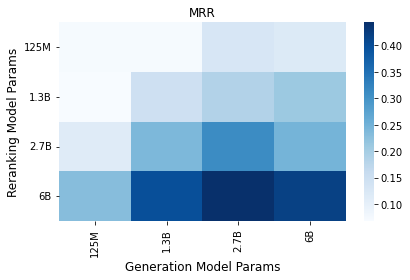

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

SHORT_LABELS = ['125M', '1.3B', '2.7B', '6B']
ax = sns.heatmap(top_prompts_heatmap, cmap='Blues')
ax.set_xticklabels(SHORT_LABELS)
ax.set_yticklabels(SHORT_LABELS)
ax.set_title('MRR')
ax.set_xlabel('Generation Model Params', fontsize='large')
ax.set_ylabel('Reranking Model Params', fontsize='large')

pdf_filename = 'ablation_prompts_disc.pdf'
plt.tight_layout()
plt.savefig(pdf_filename, dpi=300)

<AxesSubplot:xlabel='prefix_train_acc', ylabel='reciprocal_rank'>

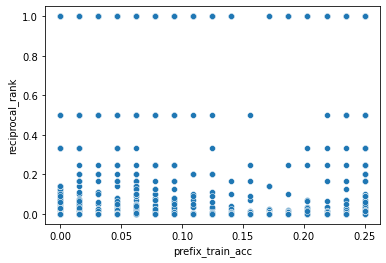

In [31]:
sns.scatterplot(data=top_prompts, x='prefix_train_acc', y='reciprocal_rank')